In [1]:
#Code for the Cab Investment project, Data Glacier internship January 2022.
#Data for this project was supplied by Data Glacier, with file copies
# stored at the locations shown below.

In [2]:
#Hypotheses that will be explored:
#1 the company having more rides will be more profitable on average per ride 

#2  some cities will be more profitable than others and the company leading 
#with ride count in those cities will be more profitable in total

#3  the rides from either gender will be similar in profit

#4 the trends for profit over time of the two companies will be similar 

#5 there will be one clear winner in terms of profitability, yellow or pink cab


In [3]:
import pandas as pd
import numpy as np

#import data from github url
#main Cab data file
url1 = "https://raw.githubusercontent.com/jenturley27/DataSets/main/Cab_Data.csv"
#create pandas df Cab from Cab_Data.csv
Cab = pd.read_csv(url1)
print(Cab.head(5))

#from City csv file, create City pandas df
url2 = "https://raw.githubusercontent.com/jenturley27/DataSets/main/City.csv"
City = pd.read_csv(url2)
print(City.head(10))

#from Customer_ID csv create CID pandas df
url3 = "https://raw.githubusercontent.com/jenturley27/DataSets/main/Customer_ID.csv"
CID = pd.read_csv(url3)
print(CID.head(5))

#from Transaction ID csv creat TID pandas df
url4 = "https://raw.githubusercontent.com/jenturley27/DataSets/main/Transaction_ID.csv"
TID = pd.read_csv(url4)
print(TID.head(5))

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 
5   ORANGE COUNTY   1,030,185     12,994 
6    SAN DIEGO CA     959,307     69,995 
7      PHOENIX AZ     943,9

In [4]:
#explore basic info, observations and number of cols (and their data types)
print("Cab dataframe")
print(Cab.shape)
print(Cab.dtypes)

print("City dataframe")
print(City.shape)
print(City.dtypes)

print("Customer ID dataframe")
print(CID.shape)
print(CID.dtypes)
print(CID.head())

print("Transaction ID dataframe")
print(TID.shape)
print(TID.dtypes)

#Drop any duplicates
Cab = Cab.drop_duplicates(['Transaction ID']) #each transaction should be included once
City = City.drop_duplicates(['City']) #each city should be listed once
CID = CID.drop_duplicates(['Customer ID']) #each unique customer ID should be listed once
TID = TID.drop_duplicates(['Transaction ID']) 

#merge dataframes into one master df, through multiple merges
Cab1 = pd.merge(TID, CID, on = 'Customer ID', how = 'outer')
Cab2 = pd.merge(Cab, Cab1, on = 'Transaction ID', how = 'outer')
# above we merged TID, CID, Cab
#finally Cab is redefined as the above Cab2 now merged with City
Cab = pd.merge(Cab2, City, on = 'City')


#add some calculated columns
Cab['Profit'] = Cab['Price Charged'] - Cab['Cost of Trip']
Cab['Profit per KM'] = Cab['Profit']/ Cab['KM Travelled']

print(Cab.dtypes)
print(Cab.head(10))
print(Cab.shape)


Cab dataframe
(359392, 7)
Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object
City dataframe
(20, 3)
City          object
Population    object
Users         object
dtype: object
Customer ID dataframe
(49171, 4)
Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536
Transaction ID dataframe
(440098, 3)
Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object
Transaction ID          int64
Date of Travel        float64
Company                object
City             

The processed data file is now converted back to .csv format


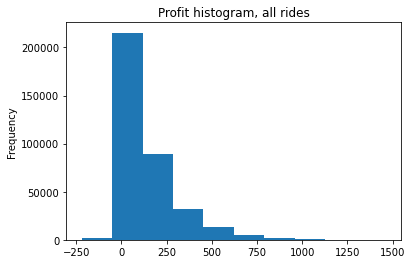

In [5]:
print("The processed data file is now converted back to .csv format")
MyCab =Cab.to_csv()
#print("The visualization is then completed using Tableau and presented via PowerPoint")

Profit = Cab["Profit"]   #create a series object
City = Cab["City"]
Profit.plot(kind="hist", title = "Profit histogram, all rides")

City
ATLANTA GA        111.477158
AUSTIN TX         107.577824
BOSTON MA          59.568883
CHICAGO IL         59.820104
DALLAS TX         160.856957
DENVER CO         103.943793
LOS ANGELES CA     91.847452
MIAMI FL          117.493220
NASHVILLE TN       49.678478
NEW YORK NY       279.947491
ORANGE COUNTY     114.766920
PHOENIX AZ         93.479109
PITTSBURGH PA      64.863638
SACRAMENTO CA      49.567466
SAN DIEGO CA       77.467955
SEATTLE WA         75.613962
SILICON VALLEY    154.561013
TUCSON AZ          72.636300
WASHINGTON DC      79.860762
Name: Profit, dtype: float64

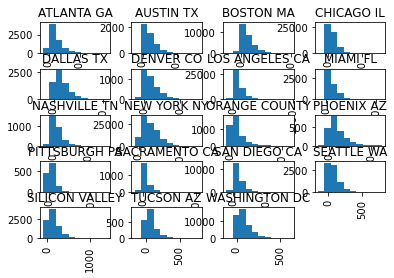

In [6]:
import matplotlib.pyplot as plt
Cab['Profit'].hist(by=Cab['City'])

#define figure size in (width, height) for all plots
plt.rcParams['figure.figsize'] = [26, 20]

avg_profit = Cab.groupby('City')['Profit'].agg(np.mean)
avg_profit


Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64

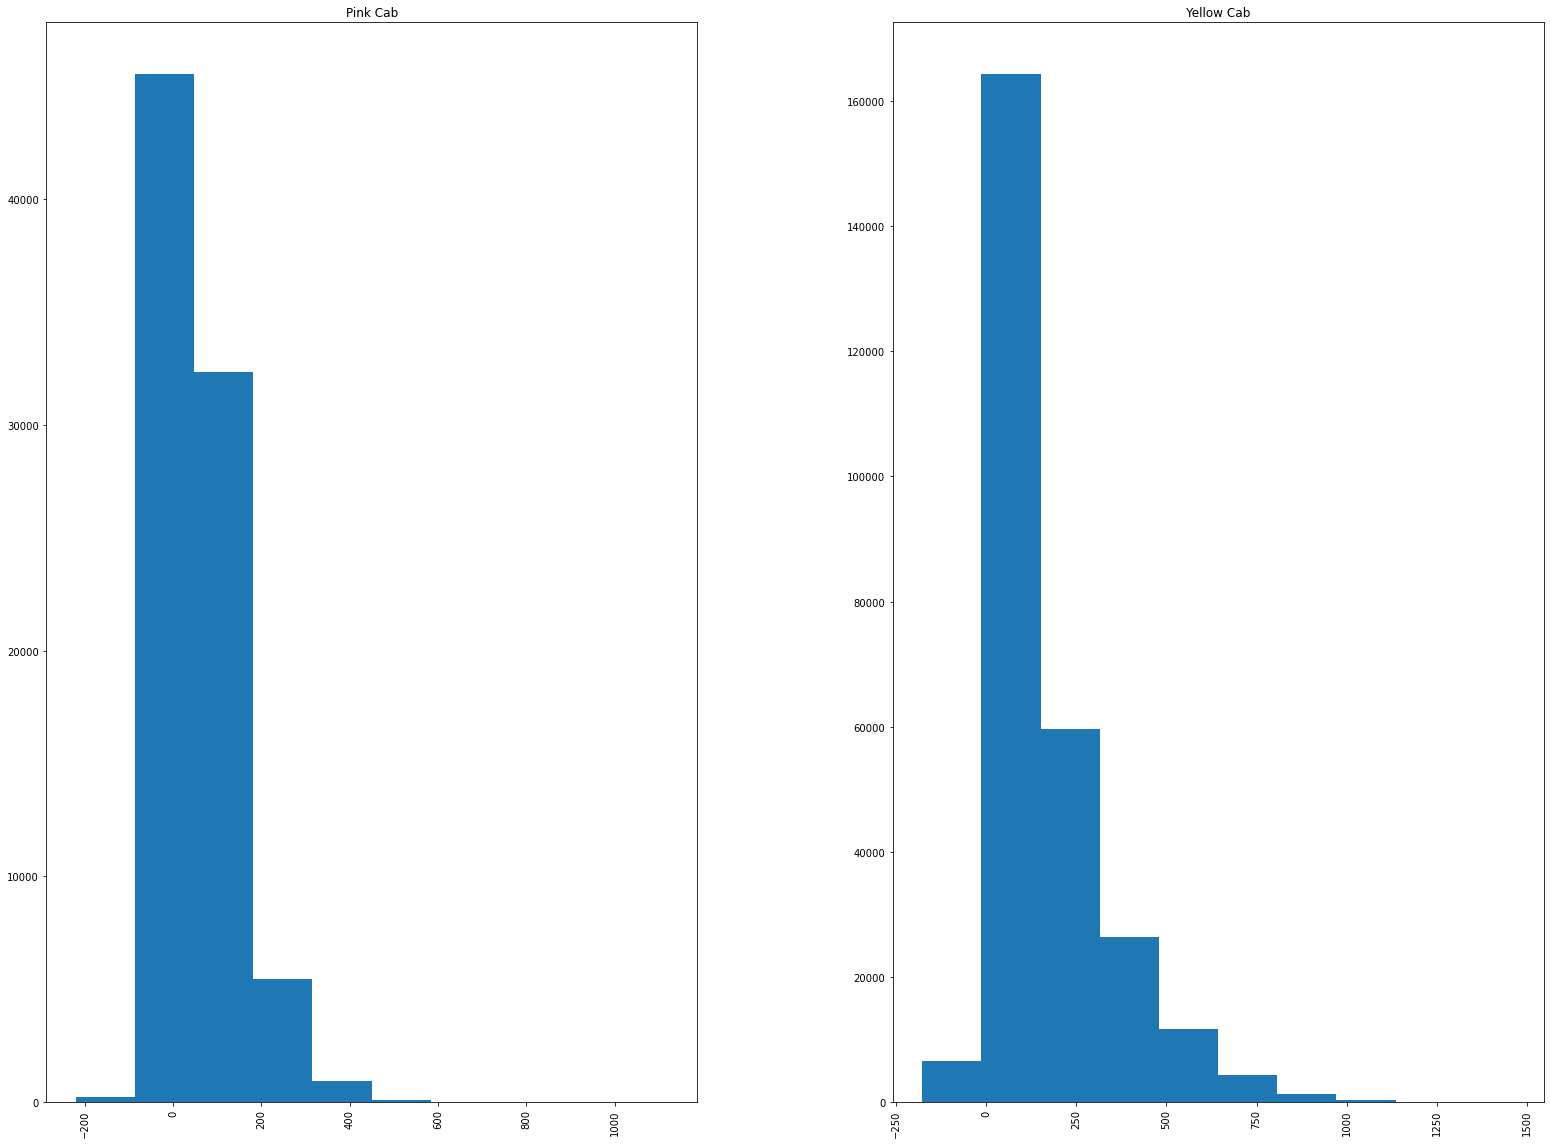

In [7]:
Cab['Profit'].hist(by=Cab['Company'])
avg_by_Company = Cab.groupby('Company')['Profit'].agg(np.mean)
avg_by_Company

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024754A79940>,
      dtype=object)

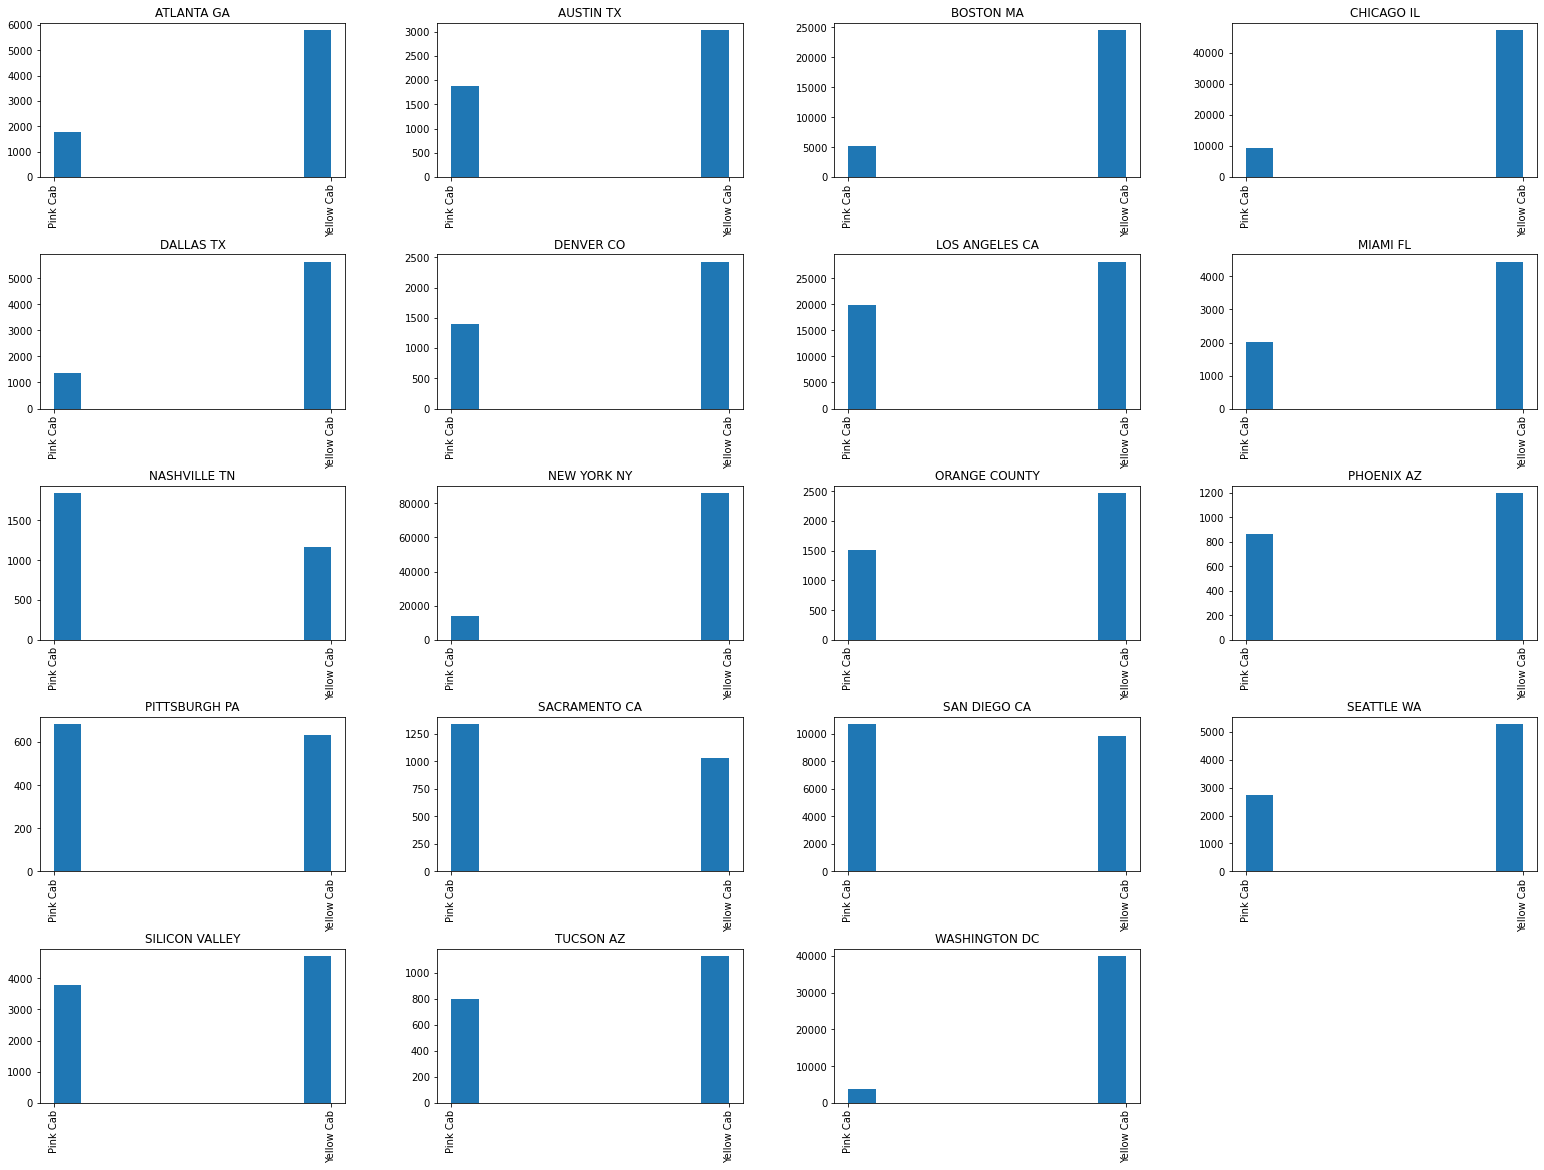

In [8]:
import matplotlib.pyplot as plt
Cab['Company'].hist(by=Cab['City'])

Gender
Female    133.319979
Male      140.184890
Name: Profit, dtype: float64

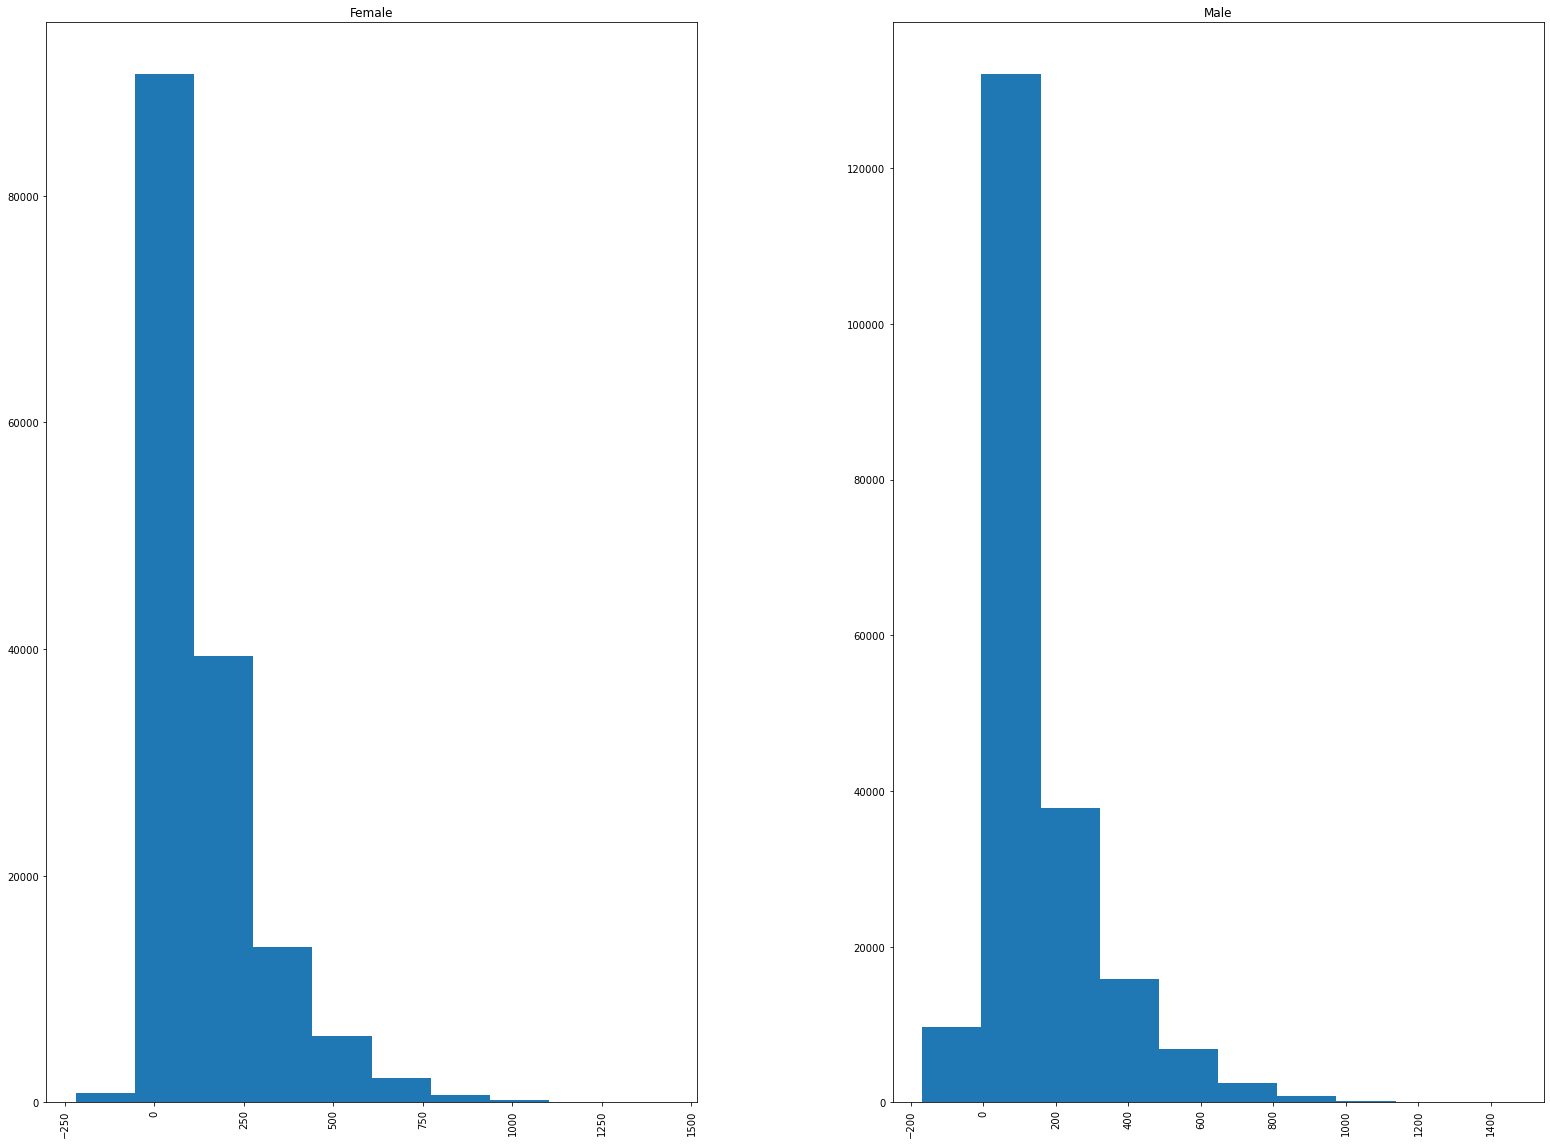

In [9]:
Cab['Profit'].hist(by=Cab['Gender'])
avg_by_gender = Cab.groupby('Gender')['Profit'].agg(np.mean)
avg_by_gender

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024751A6DF70>,
      dtype=object)

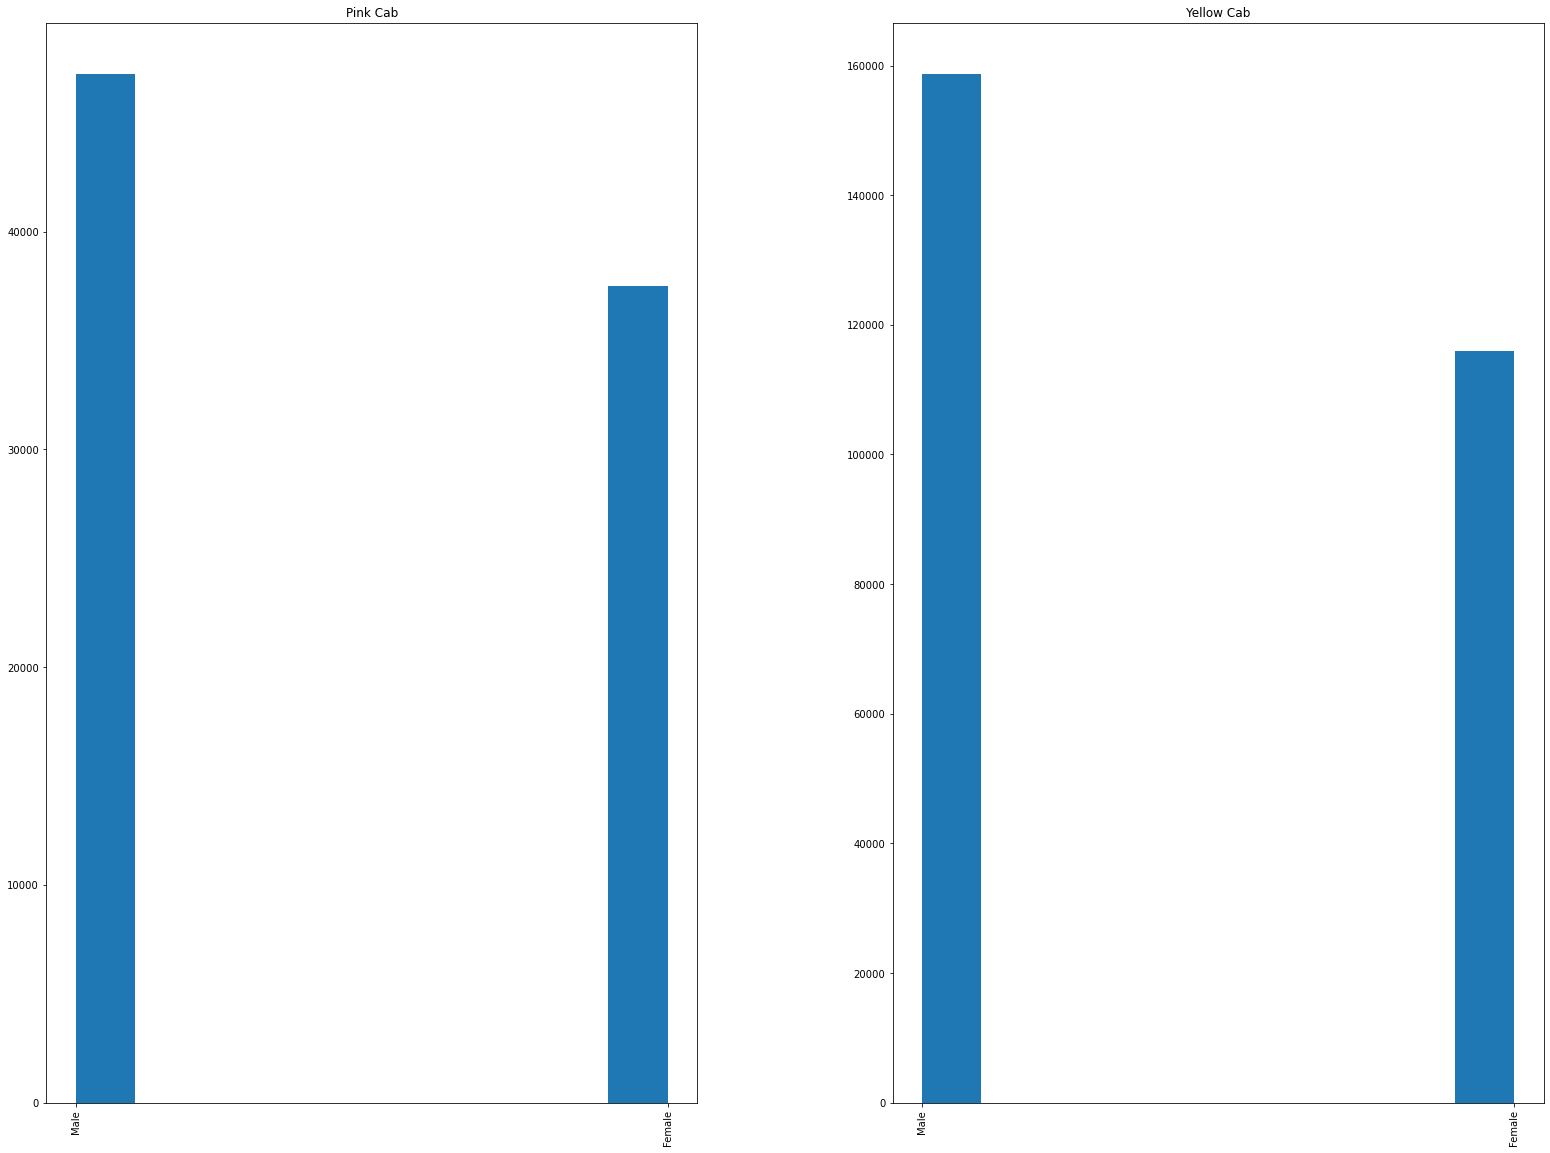

In [10]:
Cab['Gender'].hist(by=Cab['Company'])


In [11]:
# further data exploration and visualization will be done using Tableau

#The results above and the visualizations created using Tableau support the
#recommendation to invest in the Yellow Cab Company
# as it is larger, appears more efficient, and overall seems
# substantially more profitable than Pink Cab. 
